# 卷积神经网络

神经网络在处理图片等信息时，由于图片的特殊性，会是神经网络的输入层非常大，例如一个1000像素*1000像素的图片，就有1000*1000*3维的特征，所以引入了卷积运算。卷积运算是卷积神经网络的基本运算。下面使用边缘检测作为入门样例。

## 边缘检测示例

![002](images/002.png)

![003](images/003.png)

为什么可以实现垂直边缘检测？

![004](images/004.png)

卷积可以很好的发现图像中的垂直边缘。

![005](images/005.png)

单纯的垂直边缘和水平边缘滤波器，计算机视觉经常使用的滤波器；

**卷积神经网络的目的就是将滤波器作为训练参数，通过学习得到更好的滤波器，更好的识别图片中的任何角度的边缘。**

## padding

n*n的图像被f*f的过滤器卷积，会生成一个(n-f+1)*(n-f+1)的图像

如下图：

![007](images/007.png)

上述方法有所欠缺：

+ 会不断缩小的图片的大小

+ 边缘特征只被检测一一次，中间特征被多次检测。

解决办法：

在图像边缘填充像素点。padding=p（表示在图像边缘填充p个像素点）

![008](images/008.png)

Vaild和Same convolution：

![009](images/009.png)

其中$p=\frac{f-1}{2}$，当f为奇数时，输入和输出是一样大的。通常f都是取奇数（）过滤器大小。

## 步长（stride）

设置不同的步长的公式：

![010](images/010.png)


$$\frac{n+2p-f}{s}+1$$,当计算结果不为整数时，要向下地板除，取整。保证过滤器都处在图像或填充图像的内部。

![011](images/011.png)

卷积和互相关-----技术篇

![012](images/012.png)

机器学习中的卷积又称为互相关，省略了卷积的翻转操作。


## 卷积为何有效？

![013](images/013.png)

最后一个是图像的通道数，卷积过程中卷积核和对应图像各项进行先乘后加的操作。


**多核过滤器：垂直边缘，竖直边缘等**

![014](images/014.png)


**每个过滤器的信道数和他的上一层的信道数相同,然后由本层的过滤器数量决定下一层的信道数**


## 如何构建卷积神经网络的卷积层


![016](images/016.png)

参数数量：

![017](images/017.png)

推导过程：

![019](images/019.png)

总结：

+ $f^{[l]}=过滤器尺寸$

+ $p^{[l]}=padding$

+ $s^{[l]}=步长$

+ ${n_c}^{[l]}=过滤器的数量$

+ $输入：{n_H}^{[l-1]}*{n_W}^{[l-1]}*{n_c}^{l-1}$

+ $输入：{n_H}^{[l]}*{n_W}^{[l]}*{n_c}^{l}$,$${n_H}^{[l]}=\frac{{n_H}^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1$$

# 示例：


![020](images/020.png)



## 池化层

缩减模型的大小，提高计算速度，同时提高所提取特征的鲁棒性。

### 最大池化
![021](images/021.png)

超参数：过滤器大小f   ，步长 s，超级参数无需学习改变他的大小，是固定运算。常用的参数值是f=2,s=2,效果相当于宽与高缩减一半。

最大池化的就是为了放大所提取到的特征值，将其最大化。

![022](images/022.png)

![023](images/023.png)



## 全连接层

![024](images/024.png)

参数：
![025](images/025.png)


和全连接层相比，使用卷积的优点：

+ 参数共享

![026](images/026.png)

特征检测如垂直边缘检测，如果适用于图片的某个区域，那么他也可能适用于图片的其他区域。

  同样的特征提取可以使用在其他区域，以便提取垂直边缘和其他特征。

+ 稀疏连接


![027](images/027.png)





















1600 2031
[[251 251 251 ... 255 255 255]
 [255 254 254 ... 251 251 251]
 [251 251 251 ... 250 250 250]
 ...
 [251 251 251 ... 127 138 189]
 [146 102 148 ... 188 188 186]
 [185 185 184 ... 247 247 247]]
(3249600, 3)


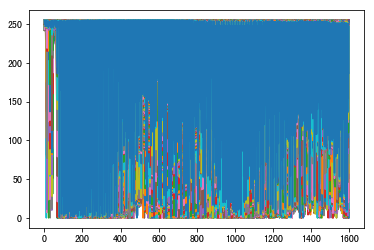

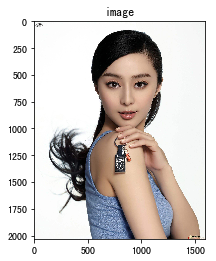

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def loadImage():
    im=Image.open("bb.jpg")
    #调用系统软件显示图片
    #im.show()
    n,m=im.size
    print(n,m)
    data=im.getdata()
    data=np.matrix(data)
    data_1=data[:,1]
    data_1=data_1.reshape(1600,2031)
    print(data_1)
    print(data.shape)
    
    plt.plot(data_1)
    
    plt.figure("bb.jpg") # 图像窗口名称
    plt.imshow(im)
    plt.axis('on') # 关掉坐标轴为 off
    plt.title('image') # 图像题目
    plt.show()
    
if __name__=="__main__":
    loadImage()

In [14]:
import numpy as np

a=np.array([[1,2,3],[4,5,6]])
b=np.array([[1,2,3],[1,2,3]])

c=np.array([[1,2,1],[3,4,3],[5,6,4]])
print(a*b)
print(np.dot(a,c))

[[ 1  4  9]
 [ 4 10 18]]
[[22 28 19]
 [49 64 43]]


原始图像：(2031, 1600, 3)
卷积图像：(2031, 1600, 3)


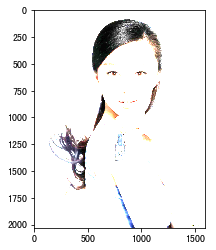

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def _convolve(img,fil):
    fil_heigh=fil.shape[0]
    fil_width=fil.shape[1]
    
    con_heigh=img.shape[0]-fil.shape[0]+1
    con_width=img.shape[1]-fil.shape[1]+1
    
    conv=np.zeros((con_heigh,con_width),dtype='uint8')
    
    for i in range(con_heigh):
        for j in range(con_width):
            conv[i][j] = wise_element_sum(img[i:i + fil_heigh,j:j + fil_width ],fil)
    return conv

def wise_element_sum(img,fil):
    res=(img*fil).sum()
    if(res<0):
        res=0
    elif res>255:
        res=255
    return res

def convolve(img,fil,mode="same"):
    if mode=="fill":
        h=fil.shape[0]//2
        w=fil.shape[1]//2
        
        img=np.pad(img,((h, h), (w, w),(0, 0)), 'constant')   #填充 
    conv_b=_convolve(img[:,:,0],fil)
    conv_g=_convolve(img[:,:,1],fil)
    conv_r=_convolve(img[:,:,2],fil)

    dstack=np.dstack([conv_b,conv_g,conv_r])
    
    return dstack


if __name__=="__main__":
    img=plt.imread("bb.jpg")
    fil=np.array([[1,1,1],
              [0,0,0],
              [1,1,1]])
    
    res = convolve(img,fil,'fill')
    print("原始图像："+str(img.shape))
    print("卷积图像："+str(res.shape))
    plt.imshow(res)
    plt.show()
    
    
    
            